<center> <h1> RAP MUSIC GENERATION </h1></center>


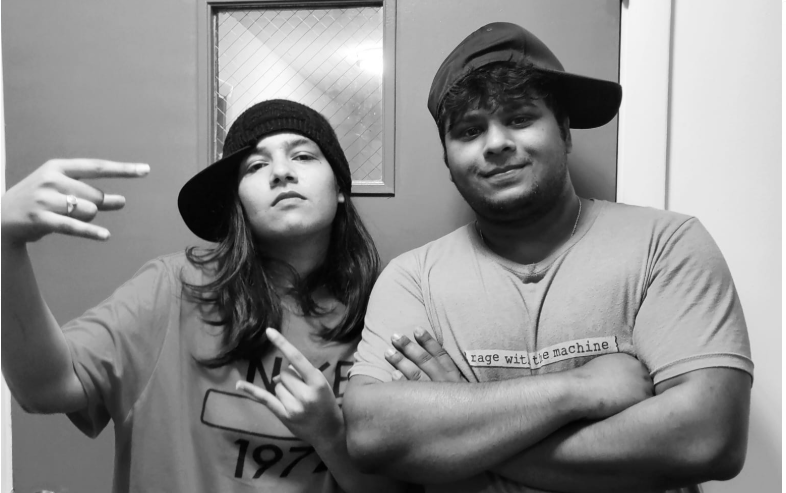

Submitted by
##### Nidhi Sharma : sharma.nidh@husky.neu.edu
##### Satwik Kashyap : kashyap.sa@husky.neu.edu

<h3> What is Rap song? </h3>

Rapping is a musical form of vocal delivery that incorporates "rhyme, rhythmic speech, and street vernacular", which is performed or chanted in a variety of ways, usually over a backing beat or musical accompaniment
<hr>

### Why do people listen to rap music?

Rap music went from an underground movement from the streets of 1970s New York City to a massive force in the music industry, with rap singles topping the pop charts. Since its inception, people have been listening to rap music for its beats, lyrics and, some argue, for its glorification of American violence. Rap music, as opposed to pop music, generally relies more on lyrics than melody. People listen to rap music for its clever and poetic wordplay, cultural references and commentary on life
<hr>
    
### What is the problem songwriters face?

Writer's block is a condition in which an author loses the ability to produce new work, or experiences a creative slowdown. The condition ranges from difficulty in coming up with original ideas to being unable to produce a work for years. 

  <hr>  

### Expectation of Project?
The rap generated by the model to be novel and in a style beliveable enough to credit the songwriter.
<hr>
    
### Why I chose this Project?

A language model attempts to learn the structure of natural language through hierarchical representations, and thus contains both low-level features (word representations) and high-level features (semantic meaning). The premise of a Language Model is to learn how sentences are built in some body of text and use that knowledge to generate new content.
We wanted to try out the language model to generate text beleivable enough to credit to a songwriter. As rap music has the highest vocabulary of words, we chose to do this to implement our model.
<hr>

### Our Approach

1. Web scrape rap lyrics from two websites of 11 different rap artists producing a corpus of 350 songs.
2. Data cleaning to prepare clean dataset of lyrics using the raw data 
3. Using Markov model and LSTM to generate unconstrained rap lyrics.
4. Evaluating the results using similarity score, BLEU and SpaCy


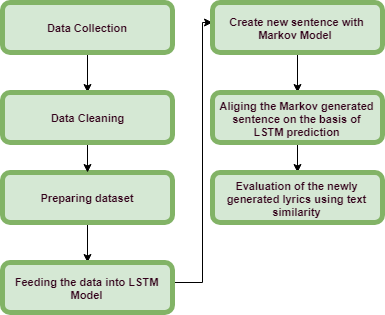

<hr>


## Data Crawling
Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites.
BeautifulSoup is a third party Python library from Crummy and the library is designed for quick turnaround projects like screen-scraping.
Song lyrics were scraped from two websites:
1. https://www.azlyrics.com/
2. https://genius.com/'


The below graph shows the number of songs and the singers we have considered to prepare the dataset
![my_image](./images/grap.jpg)

In [28]:
# import libraries
from bs4 import BeautifulSoup
import requests

In [ ]:
# Scraping from azlyrics website 

all_songs=[]
def scrape_lyrics(url):
    all_links=[]
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'lxml')
    albums = soup.findAll('div', id='listAlbum')
    for album in albums:
        a = album.findAll('a', href = True)
        for i in a:
            album_full_link = 'https://www.azlyrics.com' + i['href'][2:]
            all_links.append(album_full_link) 
        for link in all_links[40:50]:
            response = requests.get(link)
            data = response.text
            bsoup = BeautifulSoup(data, 'lxml')
            lyrics = bsoup.find('div',class_ ='col-xs-12 col-lg-8 text-center')
            a = lyrics.findChildren('div')[6]
            all_songs.append(a.text)
            all_songs.append('\n')
    return all_songs  

In [ ]:
eminem = 'https://www.azlyrics.com/d/eminem.html'
drake = 'https://www.azlyrics.com/d/drake.html'
snoop_dogg = 'https://www.azlyrics.com/s/snoopdogg.html'
kanye = 'https://www.azlyrics.com/w/west.html'
trippie = 'https://www.azlyrics.com/t/trippieredd.html'
rapper = 'https://www.azlyrics.com/c/chancetherapper.html'

In [ ]:
scrape_lyrics(drake)

In [ ]:
string_songs= ''.join(all_songs)

In [ ]:
file = open('DrakeLyrics4.txt','w') 
file.write(string_songs) 
file.close()

In [3]:
# Scraping from genius website

In [ ]:
all_lyrics = []
def scrape_lyrics_from_genius(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'lxml')
    albums = soup.findAll('div', class_='mini_card_grid')
    for album in albums:
        a = album.findAll('a', href = True)

    all_links=[]
    for i in a:
        album_full_link = '' + i['href']
        all_links.append(album_full_link) 

    for link in all_links[:]:
        songs = requests.get(link)
        soup = BeautifulSoup(songs.text, 'lxml')
        song = soup.find('div', class_='lyrics')
        lyrics= song.findChildren('p')[0]
        all_lyrics.append(lyrics.get_text())
        all_lyrics.append('\n')
        return all_lyrics

In [ ]:
nicki_minaj = 'https://genius.com/artists/Nicki-minaj'
jayz = 'https://genius.com/artists/Jay-z'
future = 'https://genius.com/artists/Future'
mustard = 'https://genius.com/artists/Mustard'
travis_scott = 'https://genius.com/artists/Travis-scott'

In [ ]:
scrape_lyrics_from_genius(travis_scott)

In [ ]:
string_of_songs= ''.join(all_lyrics)
file = open('travis_scott.txt','w')  
file.write(string_songs) 
file.close()

In [2]:
# 3. Concatenating all the lyrics file into one

In [ ]:
filenames = ['EminemLyrics1.txt', 'EminemLyrics2.txt', 'EminemLyrics3.txt','EminemLyrics4.txt','EminemLyrics5.txt']
with open('All_Eminem_lyrics.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            outfile.write(infile.read())

<hr>

## Data Cleaning and Model Creation

<b> Step 1 : Reading the rap song file </b> 

In [49]:
# read the rap text file with all the raps

rap_song_file = open(r'./All_Rap_lyrics.txt','r', encoding='utf-8').read()
rap_song_file = rap_song_file.lower() # converting all the text to lower case

<b>  Step 2 : Building bars from lyrics </b> 

#### Terminologies:
##### What is a bar in rap song:
- Usually one line of lyrics is one count, and there are 4 counts in a bar.  
- There are  16 bars in a verse in most rap songs.<br>

##### An example of bar using a lyrics below:
Lights slow motion, steppin' out the Phantom ===> 1 bar <br>
All eyes on me, peekin' and glancin' ===> 2nd bar <br>
Leanin' on the wall, with b-boys dancin' ===> 3rd bar <br>
Ears, neck, and wrists lookin' like the king's ransom ==> 4 bars <br>

###### Verse:
The combination of multiple bars is called Verse

In [50]:
# Since we need to read the lyrics bar by bar, then we will be splitting out rap songs collection line by line

bars = rap_song_file.split('\n') 

<b> Step 3 : Cleaning the bars </b>  <br>
Cleaning the bars requires carrying out the following process:

- Converting characters to the lowercase characters
- Removing empty string i.e bar which are empty
- Removing special characters from the bars to contain only alphabets and spaces
- Removing characters inside [ ] as these are not relevant to the bars we are generating as they contain information regarding the lyrics when being sung. for example [head] ,[proof], [old school hip-hop beat tune plays in the background like a radio station]
- Stripping the end charcters (if its a space), this will make the end word not to end with space
- Removing the lines which has less than 3 words

In [51]:
print('Length of the bars : ', len(bars))

Length of the bars :  28983


In [52]:
# removing the charcacters inside [] and converting the bars to lowercase

import re
print('There are characters inside [ ], these are of no significance. For example : \n\n' , bars[85:90])
new_bars = []
for bar in bars:
    bar = re.sub(r'\[.*?\]', '', bar)
    bar = re.sub(r'\(.*?\)', '', bar)
    new_bars.append(bar.lower())
bars = new_bars


There are characters inside [ ], these are of no significance. For example : 

 ['', '', '', '[old school hip-hop beat tune plays in the background like a radio station]', '']


In [53]:
# We need to remove the empty_strings in bar

print(bars[80:90]) # we see that there are some empty strings in the file
bars = list(filter(None, bars)) ## filter out the strings with None

["but when i hear the beat i'm tempted to make another attempt at it...", "i'm infinite", '', "'95, '96 ", 'and on and on and on ', '', '', '', '', '']


In [54]:
bars[85:90] # empty string have been removed

['it goes by the name of eminem',
 'and it\'s called "it\'s ok"',
 ' check it out, ',
 ' hey kyu!',
 "it's a broke day but everything is ok "]

In [55]:
# Subsituting the special characters with empty space, stripping on the end of the strings

import re
new_bars = []
for bar in bars:
    bar = re.sub('[^A-Za-z\s]+', '', bar)
    new_bars.append(bar.strip())
bars = new_bars

In [56]:
bars[85:90]# special characters have been removed

['it goes by the name of eminem',
 'and its called its ok',
 'check it out',
 'hey kyu',
 'its a broke day but everything is ok']

In [57]:
# remove lines with less than 2 words

b = []
for pos, bar in enumerate(bars):
    count_words_bar = len(re.findall(r'\w+', bar)) 
    if count_words_bar < 4:
        del bars[pos]
    else:
        b.append(bar)
        continue
bars = b

In [58]:
with open('./cleaned_Rap.txt', 'w') as f:
    for item in bars:
        f.write("%s\n" % item)

In [59]:
print('Length of the bars : ', len(bars))

Length of the bars :  20007


<b>  Step 4 : Visualizing the dataset </b> 

In [60]:
# creating a word cloud of the most used words in a lyrics

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [61]:
# combining all the bars into a single string to feed into the wordcloud generate function

str_bars = ''
str_bars = ' '.join(bars)
wordcloud = WordCloud().generate(str_bars)

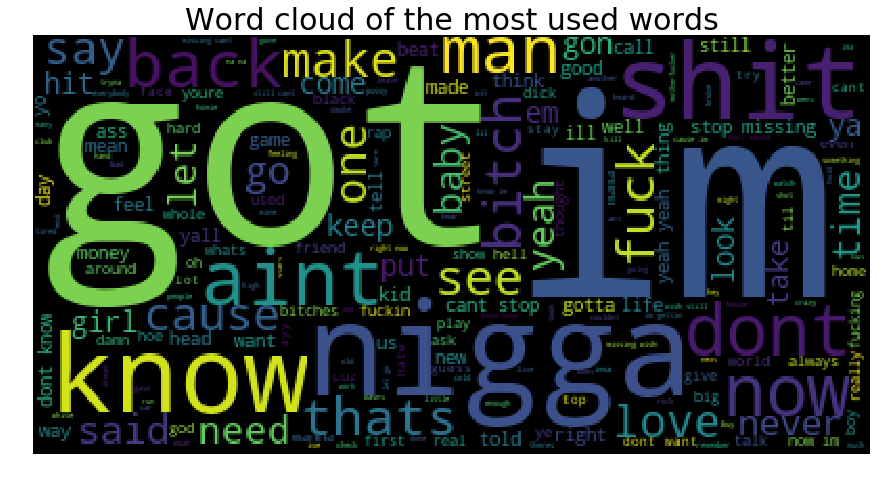

In [184]:
# forming the word cloud of the most used words in all the raps across

plt.figure(figsize=(15,100))
plt.title('Word cloud of the most used words', fontsize=30)
plt.imshow(wordcloud)
plt.axis("off") # added to not display the x and y axis
plt.show()

Text(0, 0.5, 'Number of songs')

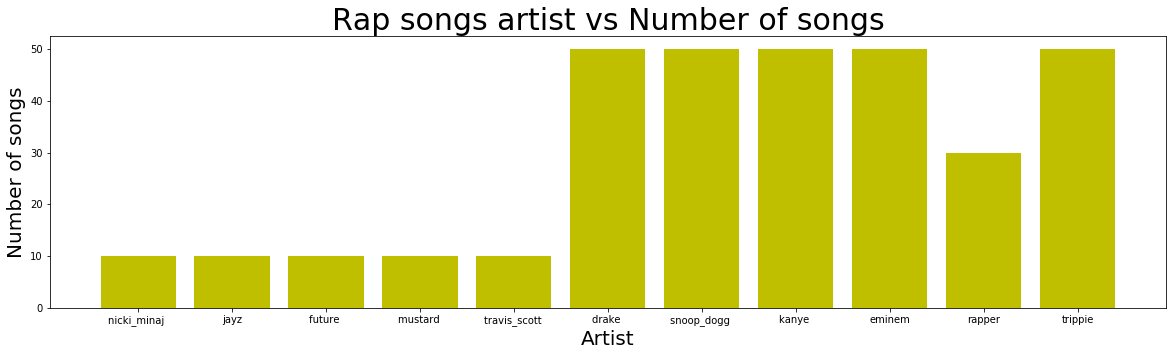

In [63]:
# visualizing artist and number of songs considered

import pandas as pd
df_artists = pd.read_excel(r'Rap_songs_artist.xlsx')

plt.figure(figsize=(20,5))
plt.title('Rap songs artist vs Number of songs', fontsize=30)
plt.bar(df_artists['Artist'],df_artists['Songs'], color= 'y')
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Number of songs', fontsize=20)

In [64]:
# counting the number and also count of unique words in the corpus

from nltk.tokenize import word_tokenize
words_count = word_tokenize(str_bars)

In [65]:
print('All the words in the bars : ' , len(words_count))
print('All the unique words in the bars : ' , len(set(words_count)))
print('The total number of bar : ', len(bars))

All the words in the bars :  169885
All the unique words in the bars :  11540
The total number of bar :  20007


<b> Step 5 : Building the list of rhymes </b>

In [66]:
import pronouncing #using this library to find the list of rhyming words

<b> Function : rhyming_list_all </b> <br>

- Since we are considering the rap with the rhyme scheme to rhyme the last word of a bar, firstly we take out the last word from every bar <br>
For example: for the last word rhyme lets consider these 2 bar:
            'to get your brain relaxing the zanyacting maniac in action',
            'a brainiac in fact son you mainly lack attraction'
<br>
- Then we are using a function pronouncing.rhymes(last_word). The function is used to find the the set of rhyming words with the last word.
<br> 
For example: pronouncing.rhymes('action') will give us the below output:
          ['abstraction', 'attraction', 'classaction', 'contraction', 'diffraction','dissatisfaction',                     'distraction', 'exaction', 'extraction', 'faction', 'fraction', 'inaction', 'infraction',                                       'interaction', 'interaction', 'liquefaction', 'reaction', 'retraction', 'satisfaction', 'satisfaction',                         'subtraction', 'telaction', 'traction', 'transaction']
<br>
- Then we consider the last 2 characters in every rhyming word which are as a result of pronouncing.rhymes(). As seen from the above example most of the words in the english dictionary rhyme when the last syllable in the word rhyme. The last syllable is mostly the set of last 2 or 3 charcters in the word. <br>
<br>
- We will create a dictionary of these 2 chracters and their corresponding count.
<br>
For example: The dictionary of the last 2 charcaters for the word 'action' is: {'on': 24}  <br>
<br>
- Then we will consider the most repeated 2 charcaters from the dictionary  <br>
<br>
- This will repeat for all the set of bar and find the last 2 characters and append it in the list

In [67]:
def rhyming_list_all(bars):
    rhyme_list_all = []
    rhyming_list_final = []
    for bar in bars:
        # taking the last word in each bar
        last_word = re.sub(r"\W+", '', bar.split(" ")[-1]).lower()
        # finding the rhyming word for 'last_word'
        #print(last_word)
        rhyming_words = pronouncing.rhymes(last_word)
        #rhyming_words = [x.encode('UTF8') for x in rhyming_words]
        #print(rhyming_words)
        rhyming_words_ending = []
        for rhyming_word in rhyming_words:
            rhyming_words_ending.append(rhyming_word[-2:]) # this will pull the last 2 characters from each rhyming word
        #print(rhyming_words_ending)
        # now we see that which of the 2 characters in the rhyming_words_ending list occur the most
        # we used a try catch that if the rhyming word is not found then we will take the last 2 characters of the original word
        try:
            rhyming_words_ending_most_common = max(set(rhyming_words_ending), key = rhyming_words_ending.count)
        except Exception:
            rhyming_words_ending_most_common = last_word[-2:]
            #print(rhyming_words_ending_most_common)
        rhyme_list_all.append(rhyming_words_ending_most_common)
        #print(rhyme_list_all)
    # now taking the set of the list to get only unique last 2 characters
    #print('for loop ended')
    rhyme_list_all = list(set(rhyme_list_all))
    reverse_list = [x[::-1] for x in rhyme_list_all] #  using slicing syntax to reverse the letters[start,stop,step],
    #print(reverse_list)
    reverse_list = sorted(reverse_list)# sorting the characters
    #print(reverse_list)
    # now we will reverse the string again : this is done so that the words with the similar sounds can be taken in order
    rhyming_list_final =  [x[::-1] for x in reverse_list]
    return rhyming_list_final

In [68]:
rhyming_list_final = rhyming_list_all(bars) # contain the list of all common rhyming words (last 2 characters) used in the lyrics across all bars

In [69]:
print(len(rhyming_list_final)) # lenth of the common rhyming words used in the lyrics across all bars
print(rhyming_list_final)

286
["s'", 'a', 'ba', 'ca', 'da', 'ea', 'ga', 'ha', 'ia', 'ja', 'ka', 'la', 'ma', 'na', 'pa', 'ra', 'sa', 'ta', 'ua', 'va', 'ya', 'za', 'ab', 'eb', 'ib', 'ob', 'rb', 'ub', 'ac', 'bc', 'fc', 'gc', 'ic', 'mc', 'nc', 'oc', 'ad', 'ed', 'id', 'ld', 'nd', 'od', 'rd', 'ud', 'vd', 'be', 'ce', 'de', 'ee', 'fe', 'ge', 'he', 'ie', 'ke', 'le', 'me', 'ne', 'oe', 'pe', 're', 'se', 'te', 'ue', 've', 'ye', 'ze', 'af', 'ef', 'ff', 'if', 'lf', 'of', 'rf', 'tf', 'ag', 'bg', 'eg', 'gg', 'ig', 'ng', 'og', 'pg', 'rg', 'ug', 'wg', 'ah', 'ch', 'eh', 'gh', 'hh', 'ih', 'oh', 'ph', 'sh', 'th', 'uh', 'ai', 'ci', 'di', 'fi', 'gi', 'hi', 'ii', 'ki', 'li', 'mi', 'ni', 'oi', 'pi', 'ri', 'si', 'ti', 'zi', 'pj', 'tj', 'ak', 'ck', 'ek', 'ik', 'lk', 'nk', 'ok', 'rk', 'sk', 'al', 'el', 'hl', 'il', 'll', 'ol', 'rl', 'tl', 'ul', 'wl', 'xl', 'am', 'bm', 'em', 'hm', 'im', 'lm', 'mm', 'om', 'rm', 'sm', 'um', 'an', 'en', 'gn', 'in', 'mn', 'nn', 'on', 'rn', 'un', 'wn', 'yn', 'ao', 'bo', 'co', 'do', 'eo', 'fo', 'go', 'io', 'jo', 

<b>  Step 6 : We will count the syallables in a sentence  </b> 

### What is a syllables:
- A syllable is a single, unbroken sound of a spoken (or written) word. Syllables usually contain a vowel and accompanying consonants <br>  
- EXAMPLE: Water has two syllables (wa / ter), Computer has three syllables (com / pu / ter)<br>

### why do we need syllables in rap song?:
- Counting syllables is an excellent skill <br>
- Important part of the structure of your rhymes is syllable structure<br>
- The syllables in each line will create a beat in your rap<br>
- Generally, by drawing out a line with too many syllables, or making a line too short with too few syllables, you can disrupt the beat of your rap<br>
- Avoid this by trying to balance rhyming lines to have the same number of beats<br>

### To note: 
- We are considering the maximun number of syllables for out rap song to be the average number of syllables across each bar in bars

                     Average syllables = [sum of syllables across each bar] / [total number of bar] 

In [70]:
import syllables
syllable_list_bar = []
def find_syllables_count(bar):
    syllable_list_bar.append(syllables.estimate(bar))
    estimate = syllables.estimate(bar)/12 # average syllables count in a bar
    estimate = round(estimate,3)
    return estimate

<b> Step 7: we would convert the index of our rhyming 2 character into float value</b> 

- Now our aim is to give a score to list of the last 2 unique charactes list we formed earlier. This is done in order to give closer score to the words which end with the same syllable sound.

- To calculate the value for the index position, we are using the formula:
                [Index position of the 2 charcaters in the list] / [Total length of the list]


In [71]:

# we are doing the following steps to see that how close the rhyming words are each other
# This will make the last words which are similar in rhyme to get closer scores

def index_rhyming_word_to_float(rhyming_list_final, bar):
    word = re.sub(r"\W+", '', bar.split(" ")[-1]).lower()
    rhymeslist = pronouncing.rhymes(word)
    #rhymeslist = [x.encode('UTF8') for x in rhymeslist]
    rhymeslistends = []
    for i in rhymeslist:
        rhymeslistends.append(i[-2:])
    try:
        rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
    except Exception:
        rhymescheme = word[-2:]
    #print(len(rhymescheme))
    try:
        float_rhyme = rhyming_list_final.index(rhymescheme)
        float_rhyme = float_rhyme / float(len(rhyming_list_final))
        float_rhyme = round(float_rhyme,3)
        #print(word, float_rhyme)
        return float_rhyme
    except Exception:
        #print(word, float_rhyme)
        return None

<b> Step 8 : combining the list of bars, syllables and float_rhyme_bar_list to a list</b> 

- The step is carried out to assign every bar with 2 values:
                            1. average syllable count
                            2. Float value of the index position
- For example:  
                ['to get your brain relaxing the zanyacting maniac in action',0.8, 0.5294117647058824],
                ['a brainiac in fact son you mainly lack attraction', 0.65,0.5294117647058824]

In [381]:
print(len(syllable_list_bar))
average = sum(syllable_list_bar)/(len(syllable_list_bar))
print('Average syllables per bar', average)

90909
Average syllables per bar 11.741191741191741


In [73]:
data_set = []
values_data_set = []
for bar in bars:
    values_data_set = [bar, find_syllables_count(bar), index_rhyming_word_to_float(rhyming_list_final, bar)]
    data_set.append(values_data_set)

### What is a verse:
- Writing arranged with a metrical rhythm, typically having a rhyme <br>

### why do we need verse in rap song?:
- Verses are an important componenent of any song <br>
- The duration is usually 16 bars, but the verse may last 8 bars, 12 bars, or 24 bars.<br>
- As seen from the above patten, we will consider a verse of length 4<br>


 <b> Step 9 : creating the X and y for the lstm model </b> 

- The following step is executed to create the dataset with features and labels
- we are looping over all the bar in bars and creating the dataset in the following pattern:
                        Combination 1 and Combination 2 ==> Features
                        Combination 3 and Combination 4 ==> Labels
- The process is being done so that the we can prepare a data set where every 2 bar is predicting the next 2 bars in the lyrics

In [386]:
import numpy as np
X = []
y = []
i = 0
for data in range(len(data_set) - 3):
    
    # this would create feature and labels as follows:
    # for example: if features ==> line 1, line 2, then labels ==> line 3, line 4
    # if features ==>  line 2, line 3, then labels ==> line4, line 5
    
    bar_1 = data_set[data][1:]
    bar_2 = data_set[data + 1][1:]
    bar_3 = data_set[data + 2][1:]
    bar_4 = data_set[data + 3][1:]       

    feature = [bar_1[0], bar_1[1], bar_2[0], bar_2[1]]
    label = [bar_3[0], bar_3[1], bar_4[0], bar_4[1]]

    feature = np.array(feature)
    label = np.array(label)
   
    feature = feature.reshape(2,2)
    label = label.reshape(2,2)
 
    X.append(feature)
    y.append(label)
X = np.array(X)
y = np.array(y)

- As seen below, the X and Y are numpy arrays, where each X and y has a shape (total number of elements, 2,2)

In [387]:
print('X ====>  \n', X[:2])
print('\ny ====> \n', y[:2])

X ====>  
 [[[1.333 0.178]
  [0.417 0.276]]

 [[0.417 0.276]
  [0.667 0.759]]]

y ====> 
 [[[0.667 0.759]
  [1.333 0.531]]

 [[1.333 0.531]
  [1.083 0.531]]]


 <b>  Step 10 : LSTM Model </b>

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.

1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way.

![my_image](./images/LSTM.jpg)


- We are using the LSTM model for training and validation
- The lSTM model would learn to find the rhyming pattern in the text which we will feed in the form of X and y
- We tried multiple combination of various hyperparamters

In [388]:
# step 9 : creating the lstm model for training
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense
from tensorflow.python.keras.callbacks import TensorBoard

In [389]:
from keras import backend
 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [390]:
import keras
import os
import tensorflow
import datetime
model = Sequential()
model.add(LSTM(2, input_shape = (2,2), return_sequences = True)) # input shape has time steps is 2 and number of features we have is also 2
model.add(LSTM(4, return_sequences = True)) # taking 3 layers with 4 nodes each
model.add(LSTM(4, return_sequences = True)) 
model.add(LSTM(4, return_sequences = True))
model.add(LSTM(2, return_sequences = True))
model.summary()

sgd = keras.optimizers.SGD(lr=0.01) # have defined the learning rate as 0.01, so that model can converge faster(it also has disadvantages)

model.compile(optimizer = sgd , loss = 'mse', metrics=[rmse]) # the optimizer function 'Stochastic gradient descent': optimizes the gradient descent and the the loss function: mse: "mean_squared_error  as its a regression problem

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 2, 2)              40        
_________________________________________________________________
lstm_62 (LSTM)               (None, 2, 4)              112       
_________________________________________________________________
lstm_63 (LSTM)               (None, 2, 4)              144       
_________________________________________________________________
lstm_64 (LSTM)               (None, 2, 4)              144       
_________________________________________________________________
lstm_65 (LSTM)               (None, 2, 2)              56        
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________


In [391]:
# we tried alot of possible combinations of model paramters but these were the best set of parameters for LSTM as seen from the graph of loss and Root mean squared error

In [393]:
# fitting the model
history_train_with_train = model.fit(np.array(X), np.array(y),epochs = 60,verbose = 1,batch_size= 100, validation_split=0.30,callbacks=[tensorflow.keras.callbacks.TensorBoard('logs')])

Train on 14002 samples, validate on 6002 samples
Epoch 1/60
14002/14002 [==============================] - 17s 1ms/step - loss: 0.5693 - rmse: 0.7269 - val_loss: 0.4368 - val_rmse: 0.6239
Epoch 2/60
14002/14002 [==============================] - 3s 201us/step - loss: 0.4505 - rmse: 0.6401 - val_loss: 0.3659 - val_rmse: 0.5637
Epoch 3/60
14002/14002 [==============================] - 3s 191us/step - loss: 0.3930 - rmse: 0.5935 - val_loss: 0.3260 - val_rmse: 0.5272
Epoch 4/60
14002/14002 [==============================] - 3s 193us/step - loss: 0.3567 - rmse: 0.5622 - val_loss: 0.2981 - val_rmse: 0.5004
Epoch 5/60
14002/14002 [==============================] - 3s 183us/step - loss: 0.3293 - rmse: 0.5377 - val_loss: 0.2761 - val_rmse: 0.4784
Epoch 6/60
14002/14002 [==============================] - 3s 194us/step - loss: 0.3067 - rmse: 0.5167 - val_loss: 0.2576 - val_rmse: 0.4593
Epoch 7/60
14002/14002 [==============================] - 3s 194us/step - loss: 0.2872 - rmse: 0.4981 - val_loss

Epoch 59/60
14002/14002 [==============================] - 3s 205us/step - loss: 0.0982 - rmse: 0.2852 - val_loss: 0.0981 - val_rmse: 0.2767
Epoch 60/60
14002/14002 [==============================] - 3s 195us/step - loss: 0.0979 - rmse: 0.2849 - val_loss: 0.0980 - val_rmse: 0.2766


In [394]:
# We can visualize in tensor board the flow of the model
# Load TENSORBOARD
%load_ext tensorboard.notebook
# Start TENSORBOARD
%tensorboard --logdir logs
%reload_ext tensorboard.notebook


Reusing TensorBoard on port 6006 (pid 39412), started 2 days, 0:37:45 ago. (Use '!kill 39412' to kill it.)

### MSE and Root Mean Squared Error

###### Mean Square Error:

The mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value

###### Root Mean Sqaured Error:

The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. 

![my_image](./images/MSE.jpg)


For calculation the loss we have use Mean squared error method

For calculation of the percentage of erro we have the criteria of using (RMSE x 100 ) % to give the deviation of percentage error of how the original value is different from the predicted value


##### The percentage of error across train and validation

- Train : 28 % 
- Validation : 27 %

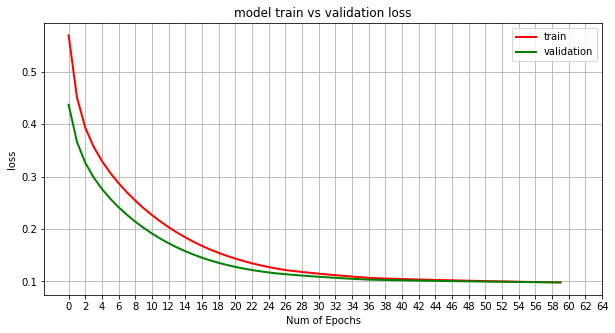

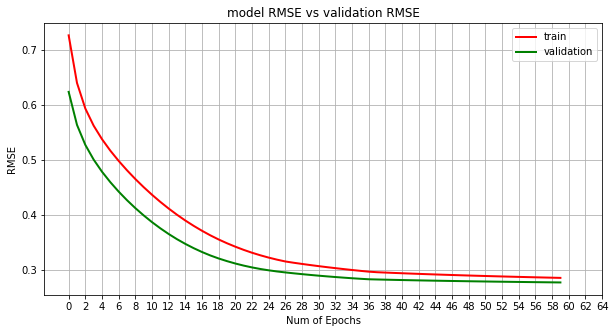

In [455]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history_train_with_train.history['loss'],'r',linewidth=2)
plt.plot(history_train_with_train.history['val_loss'],'g', linewidth=2)
plt.xticks(np.arange(0, 65, 2.0))
plt.rcParams['figure.figsize'] = (10, 5)
plt.xlabel("Num of Epochs")
plt.ylabel("loss")
plt.title('model train vs validation loss')
plt.legend(['train','validation'])
plt.grid()
plt.show()

plt.plot(history_train_with_train.history['rmse'],'r',linewidth=2)
plt.plot(history_train_with_train.history['val_rmse'],'g', linewidth=2)
plt.xticks(np.arange(0, 65, 2.0))
plt.rcParams['figure.figsize'] = (10, 5)
plt.xlabel("Num of Epochs")
plt.ylabel("RMSE")
plt.title('model RMSE vs validation RMSE')
plt.legend(['train','validation'])
plt.grid()
plt.show()

<b> <u> Step 11 : Creating new senetences using Markov chain </b> </u>

A Markov chain algorithm basically determines the next most probable suffix word for a given prefix.

To do this, a Markov chain program typically breaks an input text (training text) into a series of words, then by sliding along them in some fixed sized window, storing the first N words as a prefix and then the N + 1 word as a member of a set to choose from randomly for the suffix

The bigger the training text, the better the results.

The step is carried out to create new sentences which could be the part of the new lyrics

![my_image](./images/Markov.jpg)

The diagram representing a two-state Markov process, with the states labelled E and A. Each number represents the probability of the Markov process changing from one state to another state, with the direction indicated by the arrow. For example, if the Markov process is in state A, then the probability it changes to state E is 0.4, while the probability it remains in state A is 0.6.

In [396]:
# step 10 : now we will generate new lyrics using markov chain by creating a markov_text object, which would be used to make sentences later
import markovify
markov_text = markovify.NewlineText(rap_song_file)

In [397]:
def get_last_word(bar):
    last_word = bar.split(" ")[-1]
    # if the last word is punctuation, get the word before it
    if last_word[-1] in "!.?,":
        last_word = last_word[:-1]
    return last_word

In [398]:
def generate_lyrics():
    bars_new_lyrics = []
    last_words = []
    lyriclength = len(bars)
    count = 0
    #markov_model = markov_text((". ").join('songs.txt') + ".")

    while len(bars_new_lyrics) < lyriclength / 9 and count < lyriclength * 2:
        # By default, the make_sentence method tries, a maximum of 10 times per invocation,
        # to make a sentence that doesn't overlap too much with the original text.
        # If it is successful, the method returns the sentence as a string.
        # If not, it returns None. (https://github.com/jsvine/markovify)
        bar = markov_text.make_sentence()
        #print(bar)
        # make sure the bar isn't 'None' and that the amount of
        # syllables is under the max syllables
        if type(bar) != type(None) and find_syllables_count(bar) < 1:

            # function to get the last word of the bar
            def get_last_word(bar):
                last_word = bar.split(" ")[-1]
                # if the last word is punctuation, get the word before it
                if last_word[-1] in "!.?,":
                    last_word = last_word[:-1]
                return last_word

            last_word = get_last_word(bar)
            # only use the bar if it is unique and the last_word
            # has only been seen less than 3 times
            if bar not in bars_new_lyrics and last_words.count(last_word) < 3:
                bars_new_lyrics.append(bar)
                last_words.append(last_word)
                count += 1

    return bars_new_lyrics

In [399]:
bars_new_lyrics = generate_lyrics()

In [400]:
# using this method to clear any special characters from the newly generated sentences 
new_bars = []
for bar in bars_new_lyrics:
    bar = re.sub('[^A-Za-z\s]+', '', bar)
    new_bars.append(bar.strip())
bars_new_lyrics = new_bars

In [401]:
bars_new_lyrics[0:10] # sample of some sentence created using markov chain

['you waiting for the stove',
 'the best version of baby',
 'i swear you need a second',
 'im a freak and',
 'he gave it to they faces',
 'she got so much of a romantic',
 'im tryna live nigga',
 'surfing through the hurricane',
 'i put on your chest like sean c',
 'or was it on high']

In [402]:
print('Length of the newly generated bar using markov chain : ' , len(bars_new_lyrics))

Length of the newly generated bar using markov chain :  2223


In [403]:
# repeating the same process to find the list of rhyming characters and creating a list
rhyming_list_final_new_lyrics = rhyming_list_all(bars_new_lyrics)

In [404]:
rhyming_list_final_new_lyrics[:10] # some of the rhyming characters

['', "s'", 'a', 'ba', 'ca', 'da', 'ea', 'ga', 'ha', 'ia']

In [405]:
print(len(rhyming_list_final_new_lyrics))

204


<b> <u> Step 12 : Making prediction for the next lines to be considered for generating new rap songs </b> </u>
- The step is carried out to select any random index to start from the original lyrics
- Then selecting the next line to the randonly selected index
- Passing these inputs in the model and getting the prediction
- Using the prediction and passing it to the model to get new prediction
- This process is repeated to the length of the lyrics we want to achieve

In [406]:
import random
def predicting_lyrics(rhyming_list_final_new_lyrics, model):
    rap_lyrics_numeric_predictions = []
    start_lines = []    

    # random index to start
    initial_index = random.choice(range(len(bars) - 1))
    # choosing the next 2 lines corresponding to the index
    initial_lines = bars[initial_index:initial_index + 2]
    
    for line in initial_lines:
        start_lines.append([find_syllables_count(line), index_rhyming_word_to_float(rhyming_list_final,line)])
    
    # using the above selected lines to predict the output
    start_lines = np.array([start_lines]).reshape(1,2,2)
    start_lyrics_numeric_predictions = model.predict(start_lines)
    rap_lyrics_numeric_predictions.append(start_lyrics_numeric_predictions)
    
    # using the output of the model recursievely to find the new output, here range 50 is taken as we want out lyrics to be of length 50
    for i in range(50):
        rap_lyrics_numeric_predictions_input = np.array([rap_lyrics_numeric_predictions[-1]]).reshape(1, 2, 2)
        rap_lyrics_numeric_predictions.append(model.predict(rap_lyrics_numeric_predictions_input))
    return rap_lyrics_numeric_predictions

In [407]:
rap_generated_with_prediction = predicting_lyrics(rhyming_list_final, model)

<b> <u> Step 13 : Making prediction for the next lines to be considered for generating new rap songs </b> </u>
- The step is carried out to assign every new lyrics bar with 2 values:
                            1. average syllable count
                            2. Float value of the index position
- For example:  
                ['to get your brain relaxing the zanyacting maniac in action',0.8, 0.5294117647058824],
                ['a brainiac in fact son you mainly lack attraction', 0.65,0.5294117647058824]

In [408]:
dataset_new_lyrics = []
for line in bars_new_lyrics:
    line_list = [line, find_syllables_count(line), index_rhyming_word_to_float(rhyming_list_final_new_lyrics,line)]
    dataset_new_lyrics.append(line_list)

In [409]:
# seperating the lines predicted into multiple line. 
#As we know that the data we have is in the shape(2x2) but we need to change it to (#1x1) so each line can be taken in account
rap_bars = []
for raps in rap_generated_with_prediction:
    rap_bars.append(list(raps[0][0]))
    rap_bars.append(list(raps[0][1]))


<b> <u> Step 14 : Comapring the newly generated lyrics with predicted output </b> </u>

In [410]:
# we are doing this to penalise the new sentences whose last word matches with the already existing last word in the newly predicted rap
# the step is necessary so that the sentence with same ending words are not selected twice

def comparing_last_words_bars(rap, line2):
    additional_penalising = 0
    for line1 in rap:
        last_word_rap = line1.split(" ")[-1] # last word selected in rap
        last_word_new_lyrics = line2.split(" ")[-1] # last word in each item of data_set_new_lyrics
        if last_word_rap == last_word_new_lyrics:
            additional_penalising += .2 # penalty could be any, but here we will penalize the value by 2

    return additional_penalising

# vector_half is a single [syllable, rhyme_index] pair
# returns a score rating for a given line
def calculate_score(vector_half, syllables, rhyme, penalty):
    desired_syllables = vector_half[0]
    desired_rhyme = vector_half[1]
    syllables = syllables * 12
    rhyme = rhyme * len(rhyming_list_final_new_lyrics)
    desired_syllables = desired_syllables * 12
    desired_rhyme = desired_rhyme * len(rhyming_list_final)

    score = (abs((float(desired_syllables) + float(syllables) + float(desired_rhyme) + float(rhyme)))) - penalty

    return score


In [411]:
def song_generation(rap_generated_with_prediction, bars_new_lyrics, rhyming_list_final_new_lyrics):
     # generated a list of all the lines from generated_lyrics with their
    # line, syllables, and rhyme float value
    rap = []
    #print(rap_bars) # predictions are subdivided into an array of [syllable and rhyming index pair]
    for rap_bar in rap_bars:
        # The bar in the predicted bars is scored against every generated bar
        scorelist = []
        for item in dataset_new_lyrics:
            # item is one of the generated bars from the Markov model
            line = item[0] 
            #print('len(rap)', rap)
            if len(rap) != 0:
                penalty = comparing_last_words_bars(rap, line)
            else:
                penalty = 0
            # calculate the score of the current line
            total_score = calculate_score(rap_bar, item[1], item[2], penalty)
            score_entry = [line, total_score]
            # add the score of the current line to a scorelist
            scorelist.append(score_entry)

        fixed_score_list = []
        for score in scorelist:
            fixed_score_list.append(float(score[1]))
        
        # Highest score of the bar of newly generated lyrics is taken as a match to what is predicted by the model. 
        max_score = max(fixed_score_list)
        for score in scorelist:
            #print(item)
            if score[1] == max_score:
                rap.append(score[0])
                
                for data in dataset_new_lyrics:
                    if item[0] == data[0]:
                        dataset_new_lyrics.remove(data)# removing the bar which has been added to our final list
                        break
                break
    return rap


In [412]:
rap_song_generated = song_generation(rap_generated_with_prediction, bars_new_lyrics, rhyming_list_final_new_lyrics)

In [380]:
from termcolor import colored
print(colored('============================= OUR RAP SONG =============================', 'red'))
for rap in rap_song_generated:
    print(colored(rap, 'blue'))

============================= OUR RAP SONG =============================
this why i pray the lord my soul away
only righteous i might get sick today
beat it like a building lobby
this the real slim shady
dont try to act moody
now are you ready
let me in the listening in this solo
back but fuck bitches get a  in the stereo
i hit her with all these thots i sex
so ill tell you its ready today
right by the black marshall meets jay
you gonna try to try to play
bet i get a song with coldplay
wave your motherfuckin way
but dont know what it is okay
just look you up itd be payday
i always bring my name is taadow
wait i mean theres always tomorrow
you waiting for the fam okay
but today i got to stay
get your ass in anyway
and everything you say
put it down to see dr bombay
four years and you baby
works like a zombie
me and julien we never gonna die whoo
cause if so she wouldnt have nothin woo
as for me to keep the doggystyle crew
i get so fly like a lawn chair hugh hugh
ayy tell that bitch anyw

<hr>

## Evaluation of the results

                            Evaluation creiteria chosen:
                            1. Jaccard Similarity
                            2. Cosine Similarity
                            3. Bleu Score

<b> Method 1 : Jaccard Similarity </b>

The Jaccard similarity index (sometimes called the Jaccard similarity coefficient) compares members for two sets to see which members are shared and which are distinct. 

It’s a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations. 

In [14]:
def get_jaccard_sim(text1, text2): 
    a = set(text1.split()) 
    b = set(text2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [26]:
print('Jaccard similarity is: ', get_jaccard_sim(data,data2)  * 100)


Jaccard similarity is:  1.3509501187648456


<b> Method 2 : Cosine similarity </b> <br>

Cosine similarity calculates similarity by measuring the cosine of angle between two vectors. With cosine similarity, we need to convert sentences into vectors. One way to do that is to use bag of words with either TF (term frequency) or TF-IDF (term frequency- inverse document frequency).

TF is good for text similarity in general, but TF-IDF is good for search query relevance.

In [17]:
import nltk, string
from nltk.stem import WordNetLemmatizer
from pywsd.utils import lemmatize_sentence
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt') 
nltk.download('wordnet') 
nltk.download('averaged_perceptron_tagger')

stemmer = nltk.stem.porter.PorterStemmer()
lmm = WordNetLemmatizer()
word_list1 = nltk.word_tokenize(data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91880\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91880\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91880\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
lemmatized_output1 = ' '.join([lmm.lemmatize(w) for w in word_list1])
word_list2 = nltk.word_tokenize(data2)
lemmatized_output2 = ' '.join([lmm.lemmatize(w) for w in word_list2])

In [19]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

In [20]:
print(cosine_sim(lemmatized_output1, lemmatized_output2))
tf = vectorizer.fit_transform([lemmatized_output1, lemmatized_output2])
similarity_matrix = cosine_similarity(tf)
print(similarity_matrix)

0.46680079251068124
[[1.         0.46680079]
 [0.46680079 1.        ]]


In [21]:
## Earlier Lyrics Score
print('Cosine similarity score is:  0.46680079251068124')
print('[[1.  0.46680079][0.46680079   1.]]\n')

Cosine similarity score is:  0.46680079251068124
[[1.  0.46680079][0.46680079   1.]]



<b> Method 3 : Bleu Score</b>

The Bilingual Evaluation Understudy Score, or BLEU for short, is a metric for evaluating a generated sentence to a reference sentence.

A perfect match results in a score of 1.0, whereas a perfect mismatch results in a score of 0.0.

In [23]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu


In [24]:
b = data.split(' ')
a = data2.split(' ')
score = sentence_bleu(a, b)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\ProgramData\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\ProgramData\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

1.744429897329347e-232


<hr>

##### REFERENCES:

We have referred and went through several different articles, journals and github repository in order to approach the question for rap lyrics generation. The idea has mainly been adapted by the below two Journal articles where the use of Markov chain and LSTM has been done to ahieve the output. From github we have adapted the idea to strcutre the code.Below are the list of references 

<b>Journal articles </b>

Potash, P., Romanov, A. and Rumshisky, A. (2015). GhostWriter: Using an LSTM for Automatic Rap Lyric Generation. Dept of Computer SCience. University of Massachusetts Lowell. http://www.emnlp2015.org/proceedings/EMNLP/pdf/EMNLP221.pdf
<br>
<br>
Potash, P., Romanov, A. and Rumshisky, A. (2015). Evaluating Creative Language Generation: The Case of Rap Lyric Ghostwriting. Dept. of Computer Science. University of Massachusetts Lowell. https://www.aclweb.org/anthology/W18-1604


<b> GitHub Repository </b> 

https://github.com/llSourcell/Rap_Lyric_Generator<br>
https://github.com/robbiebarrat/rapping-neural-network

<b> Online articles </b>

https://colah.github.io/posts/2015-08-Understanding-LSTMs/<br>
https://towardsdatascience.com/using-a-markov-chain-sentence-generator-in-python-to-generate-real-fake-news-e9c904e967e


